<a href="https://colab.research.google.com/github/wmhowarth/Prediction-of-Product-Sales/blob/main/Copy_of_Project1_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Prediction of Product Sales

- Author: Warren Howarth

## Project Overview




## Load and Inspect Data




## Clean Data

## Exploratory Data Analysis

## Explanatory Data Analysis

## Feature Inspection



## Loading Data

In [ ]:
import pandas as pd


In [ ]:
df_sales = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')

In [ ]:
# View first 5 rows
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# View schema data using .info()
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

-Duplicates
-- There are no duplicates

In [ ]:
df_sales.duplicated().sum()

0

In [ ]:
df_sales.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
duplicate_items = df_sales.duplicated()
duplicate_items

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
df_sales[duplicate_items]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


- Changing Data Types

In [ ]:
cat_cols = df_sales.select_dtypes('object').columns

In [ ]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Outlet size - defined as 'The size of the store in terms of ground area covered' should probably be float
df_sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# maybe not
# let's look at the other values in the object columns
for name in cat_cols:
  print(f'The values for {name}')
  print(df_sales[name].value_counts())
  print('\n')

The values for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


The values for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The values for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The values for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035  

In [ ]:
# the 'object' columns look good
# now for the numeric columns
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# let's look at the values in the numeric columns
for name in num_cols:
  print(f'The values for {name}')
  print(df_sales[name].value_counts())
  print('\n')

The values for Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


The values for Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


The values for Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64


The values for Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


The values for Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845.5976    1

- Item_MRP - (maximum retail price, monetary amount - round to 2 decimals ?)
- Item_Outlet_Sales - (Sales of the product per store, not sure in monetary amount (round to 2 decimals) or unit amount (integer value))


## Missing values

<Axes: >

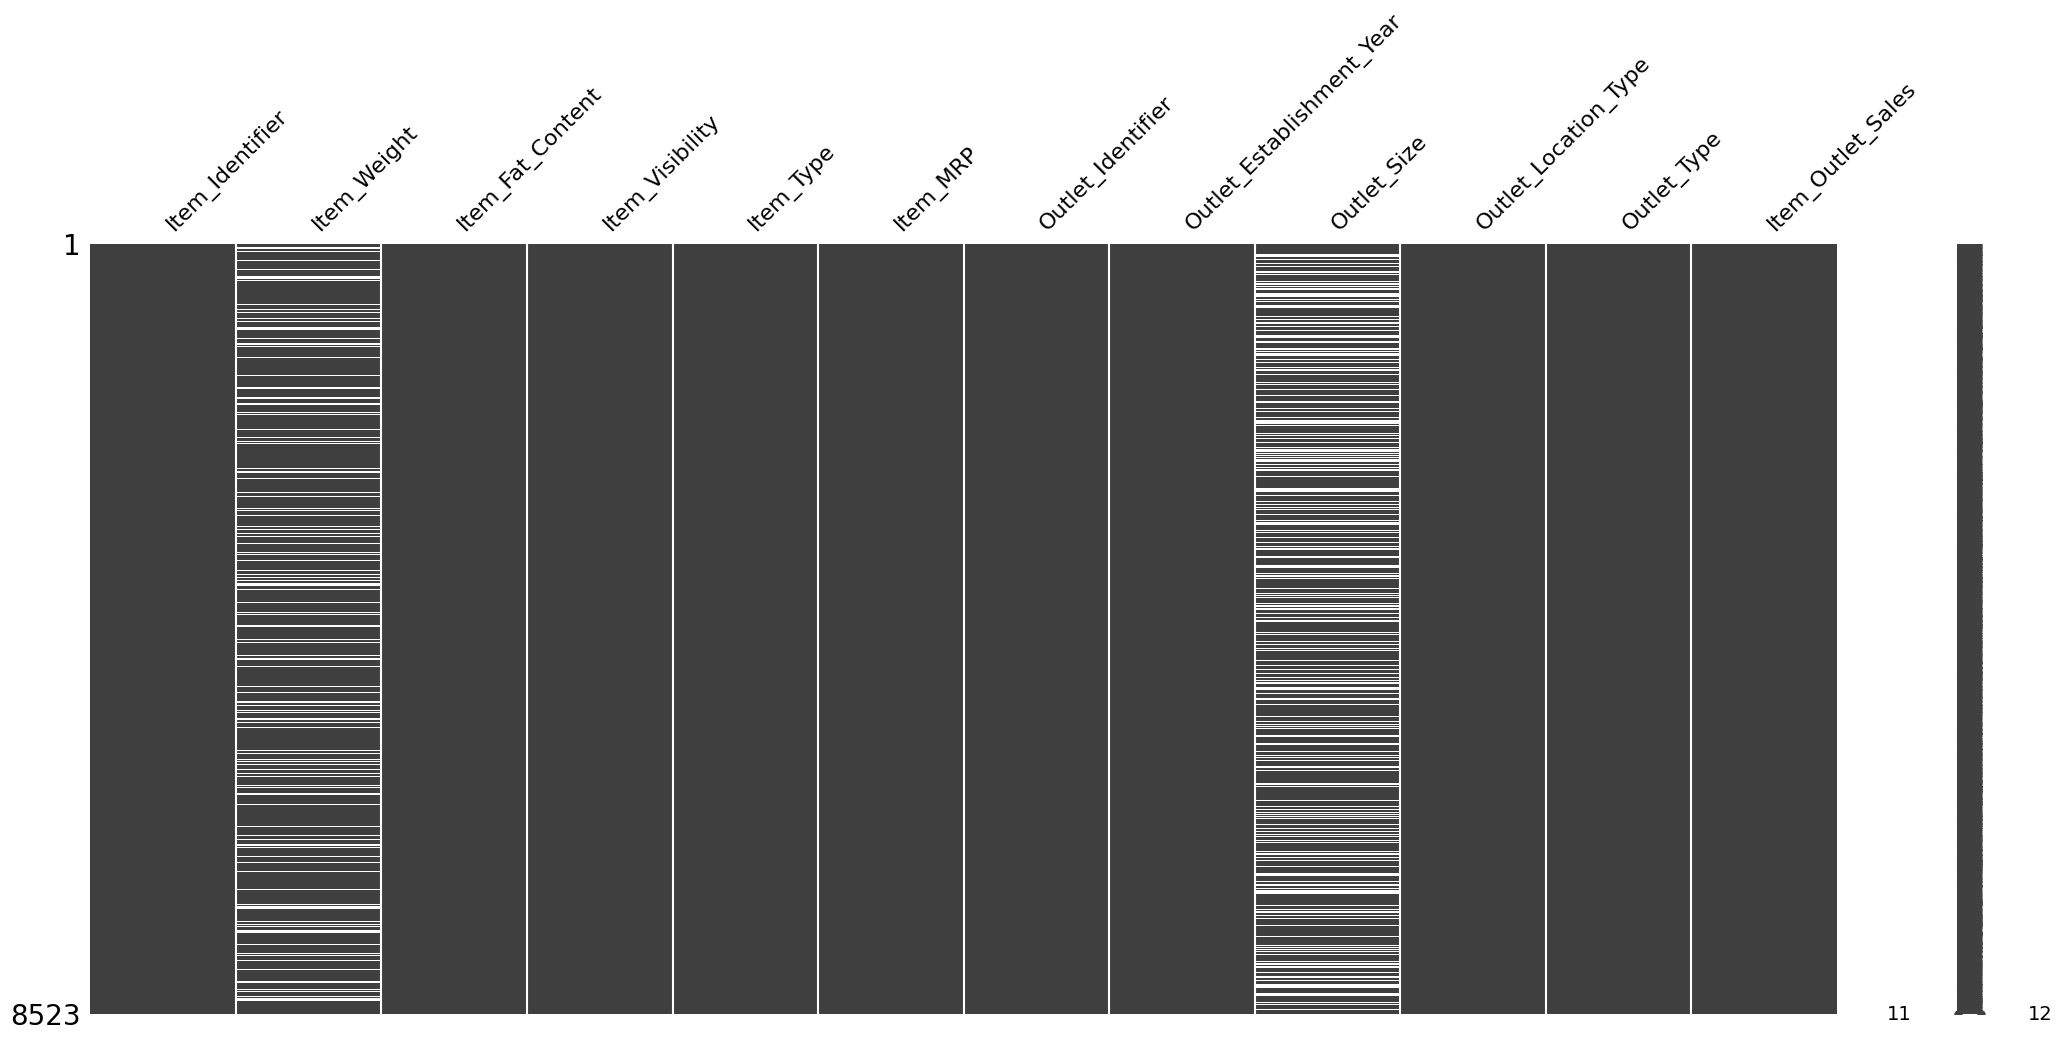

In [ ]:
# Using missingno matrix
import missingno as msno
msno.matrix(df_sales)

In [ ]:
# Using panda for 'Item_Weight'
df_sales['Item_Weight'].isna().sum()

1463

In [ ]:
# As percentage
(df_sales['Item_Weight'].isna().sum() / len(df_sales)) * 100

17.165317376510618

In [ ]:
# replace with -1
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)

In [ ]:
# recheck
df_sales['Item_Weight'].isna().sum()

0

In [ ]:
# Using Panda for 'Outlet_Size'
df_sales['Outlet_Size'].isna().sum()

2410

In [ ]:
# As percentage
(df_sales['Outlet_Size'].isna().sum() / len(df_sales)) * 100

28.27642848762173

In [ ]:
# Replace with 'MISSING'
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('MISSING')

In [ ]:
# recheck
df_sales['Outlet_Size'].isna().sum()

0

<Axes: >

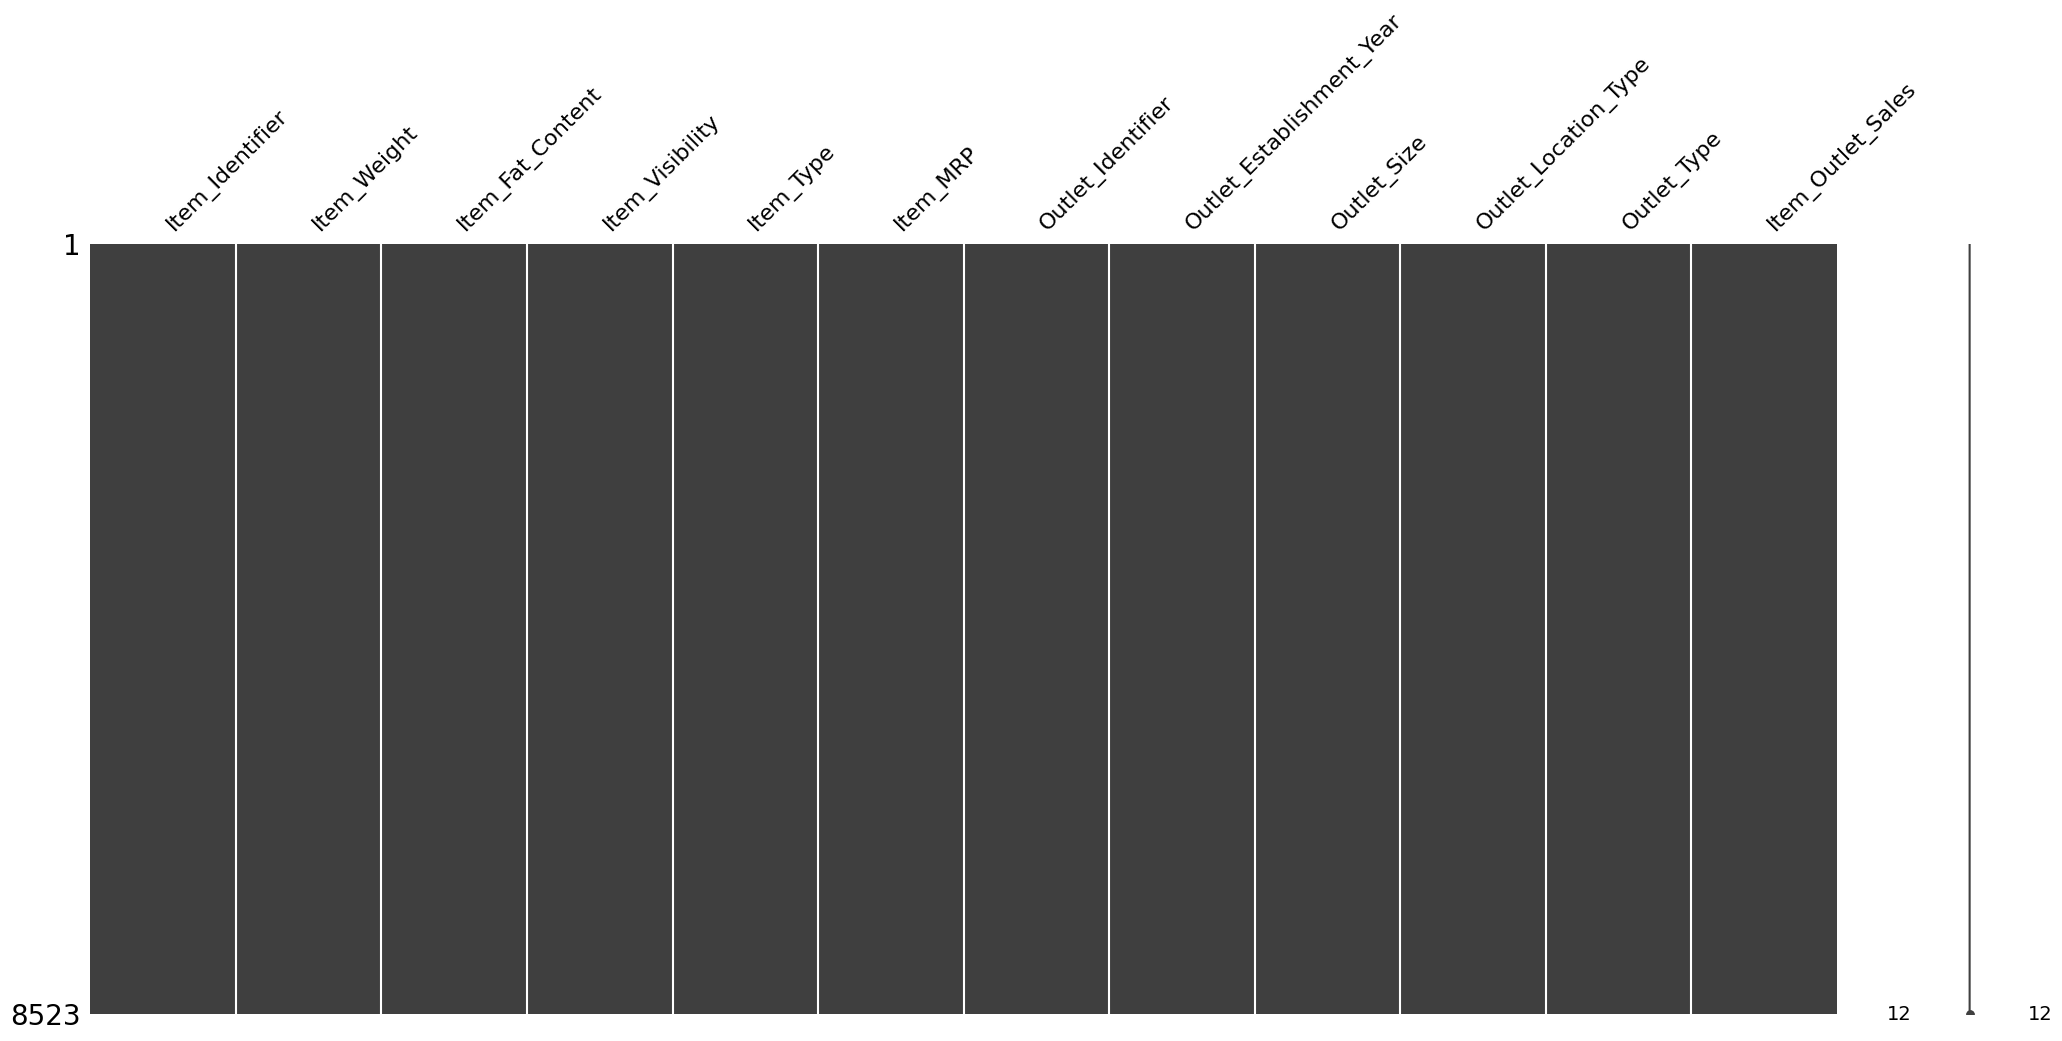

In [ ]:
# Recheck for missing data usinf missingno matrix
msno.matrix(df_sales)

## Statistical info of the number columns


In [ ]:
df_sales.describe().round()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.0,8523.0,8523.0,8523.0,8523.0
mean,10.0,0.0,141.0,1998.0,2181.0
std,7.0,0.0,62.0,8.0,1706.0
min,-1.0,0.0,31.0,1985.0,33.0
25%,7.0,0.0,94.0,1987.0,834.0
50%,11.0,0.0,143.0,1999.0,1794.0
75%,16.0,0.0,186.0,2004.0,3101.0
max,21.0,0.0,267.0,2009.0,13087.0


In [ ]:
# Save the file to the drive
fout = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week03/Data/Project1.csv'
df_sales.to_csv(fout)

# Week 3
## Vizualizations


In [ ]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# import the data
fname = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week03/Data/Project1.csv'
df = pd.read_csv(fname)
df.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                8523 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Unnamed: 0', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

- Histograms
-- Used to compare 2 values
-- `Lets examine the Item Market Retail Price`

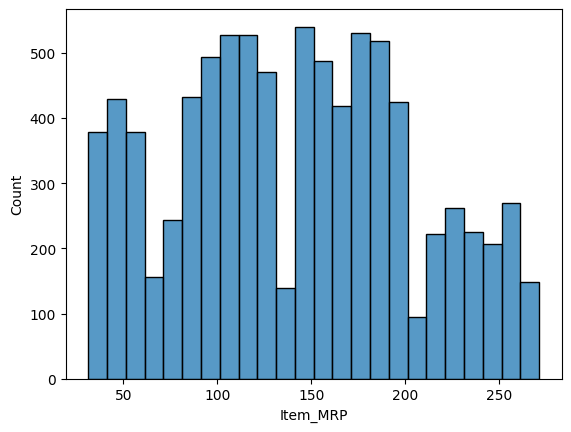

In [ ]:
# Using Seaborn
ax = sns.histplot(data = df, x = 'Item_MRP', binwidth = 10)

It doesn't look like this is useful at all

So we will try other features

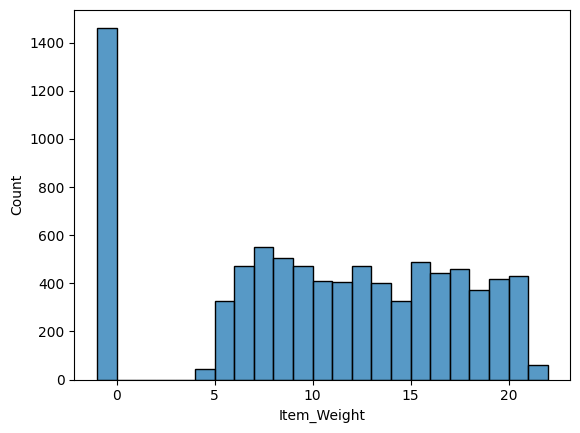

In [ ]:
# Using Seaborn
ax = sns.histplot(data = df, x = 'Item_Weight', binwidth = 1)

We previously updated the Missing values to -1, so that is the reason there are so many. Once again, it is not a useful metric

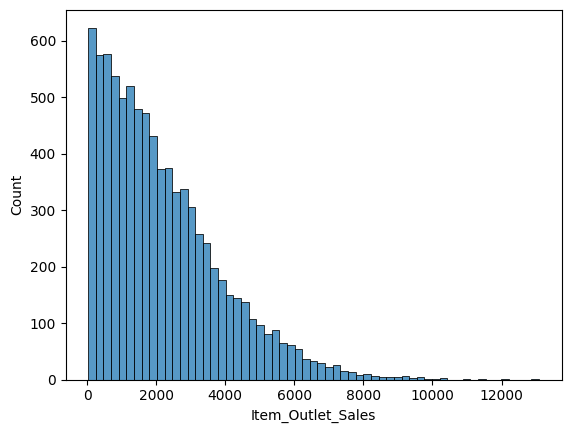

In [ ]:
# Using Seaborn
ax = sns.histplot(data = df, x = 'Item_Outlet_Sales')

- Boxplots
-- Statistical Summaries

In [ ]:
# We will use .describe() to get the info on quartiles
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

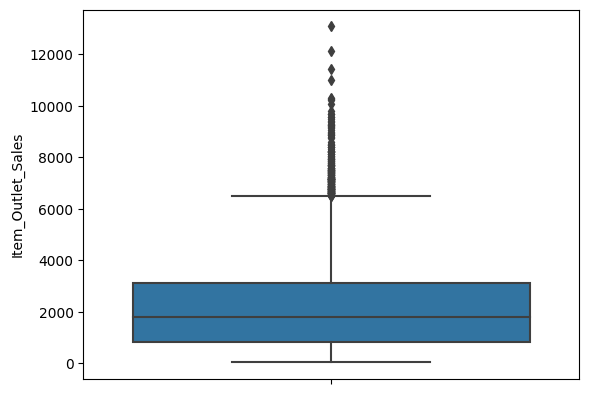

In [ ]:
# Using Seaborn
ax = sns.boxplot(data = df, y = 'Item_Outlet_Sales')

There are a number of outliers over the maximum value

- Countplots
-- To view the categorical amounts

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df[cat_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [ ]:
# look at the item_type value_counts
val_counts = df['Item_Type'].value_counts()
val_counts

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

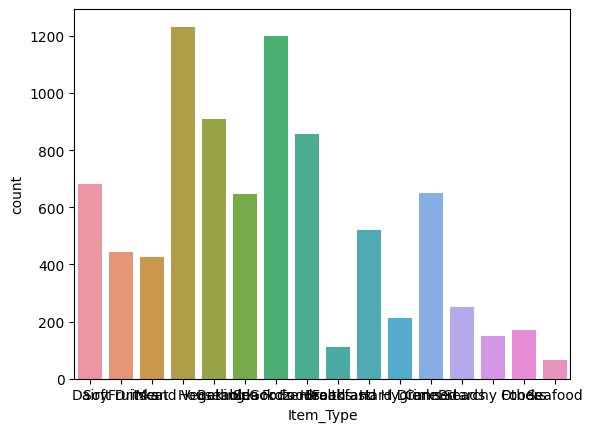

In [ ]:
# Using Seaborn
ax = sns.countplot(data = df, x = 'Item_Type')

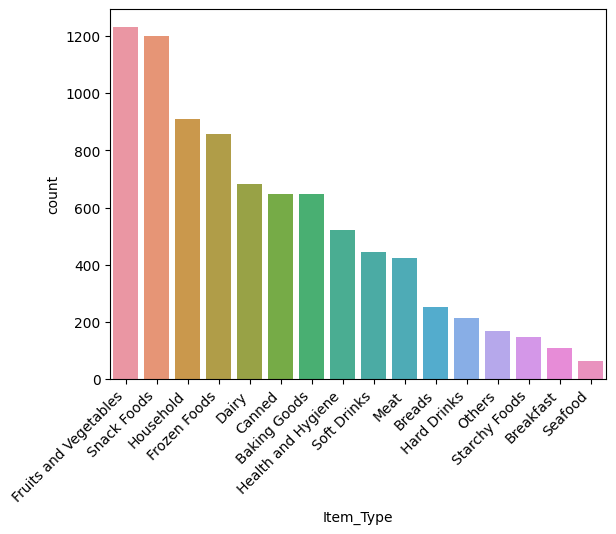

In [ ]:
# Now order them in descending order and neaten the graph
ax = sns.countplot(data = df, x = 'Item_Type', order = val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right');

You can see that Fruits and Vegetables, Snack Foods, Household and Frozen Foods were the best sellers in terms of nmber of items sold

- Heatmaps
-- The correlation between numeric items

In [ ]:
# Using .corr() on the dataframe using numeric_only = True
corr = df.corr(numeric_only = True)
corr.round(2)

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Unnamed: 0,1.00,-0.03,-0.00,0.00,0.00,-0.01
Item_Weight,-0.03,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.00,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.00,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.00,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.01,-0.06,-0.13,0.57,-0.05,1.00


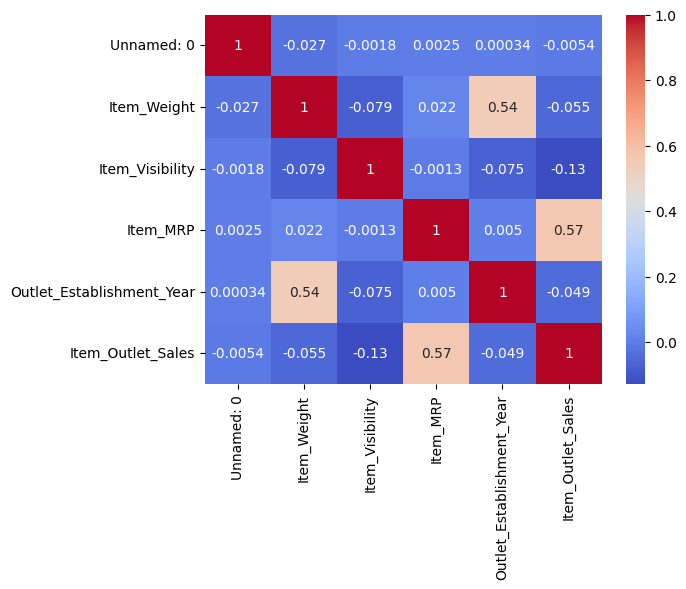

In [ ]:
# Create the heatmap
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

There is a positive relationship between Item_Price and Item_Outlet_Sales, which is to be expected.
There is also a positive relationship between Outlet_Establishment_Year and Item_Weight, which is less obvious

In [ ]:
# Save the file to the drive
fout = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week04/Data/Project1.csv'
df.to_csv(fout)

# Week 4

## Feature Analysis

In [1]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# import the data
fname = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week04/Data/Project1.csv'
df = pd.read_csv(fname)
df.head()

,Unnamed: 0.1,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Remove the placeholders you added in week 2 and replace them with null values.

'Item_Weight' - replaced with -1

df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)

In [8]:
# get the number of records
item_weight_filter = df['Item_Weight'] == -1
df.loc[item_weight_filter, 'Item_Weight'].count()

1463

In [9]:
# replace with nulls
df.loc[item_weight_filter, 'Item_Weight'] = np.nan

In [10]:
# recheck number of nulls
df['Item_Weight'].isna().sum()

1463

'Outlet_Size' - replaced with 'MISSING'

df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('MISSING')

In [11]:
# get the number of records
outlet_size_filter = df['Outlet_Size'] == 'MISSING'
df.loc[outlet_size_filter, 'Outlet_Size'].count()

2410

In [12]:
# replace with nulls
df.loc[outlet_size_filter, 'Outlet_Size'] = np.nan

In [13]:
# recheck number of nulls
df['Outlet_Size'].isna().sum()

2410

Recheck data validity

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               8523 non-null   int64  
 1   Unnamed: 0                 8523 non-null   int64  
 2   Item_Identifier            8523 non-null   object 
 3   Item_Weight                7060 non-null   float64
 4   Item_Fat_Content           8523 non-null   object 
 5   Item_Visibility            8523 non-null   float64
 6   Item_Type                  8523 non-null   object 
 7   Item_MRP                   8523 non-null   float64
 8   Outlet_Identifier          8523 non-null   object 
 9   Outlet_Establishment_Year  8523 non-null   int64  
 10  Outlet_Size                6113 non-null   object 
 11  Outlet_Location_Type       8523 non-null   object 
 12  Outlet_Type                8523 non-null   object 
 13  Item_Outlet_Sales          8523 non-null   float

In [17]:
# check uniqueness of Item Identifier
df['Item_Identifier'].nunique()

1559

In [19]:
# check uniqueness of 'Unnamed: 0.1' and 'Unnamed: 0'
df['Unnamed: 0.1'].nunique()

8523

In [20]:
df['Unnamed: 0'].nunique()

8523

In [21]:
# remove 'Unnamed: 0'
df = df.drop(columns = ['Unnamed: 0'])

Add the EDA functions

In [22]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [23]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Data Dictionary

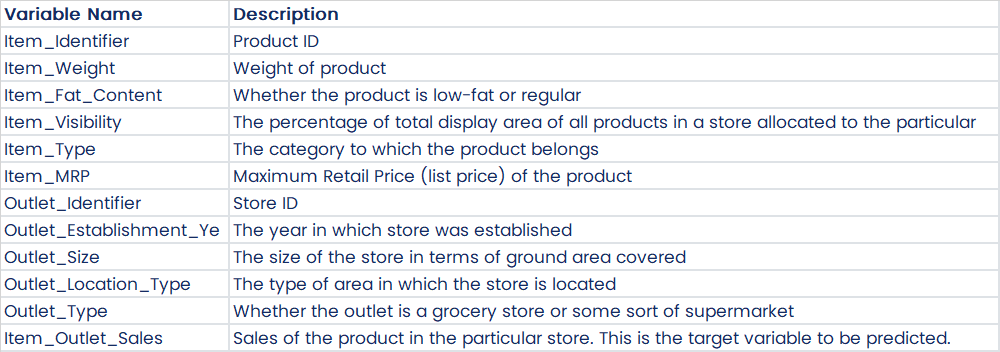

## Item Identifier

Product ID

In [25]:
# Get the datatype
feature = 'Item_Identifier'
df[feature].dtype

dtype('O')

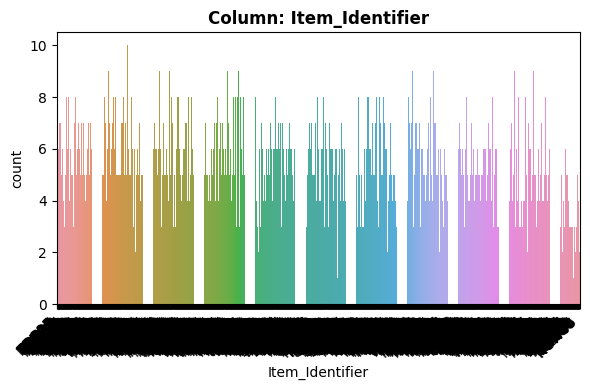

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [27]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute.

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 0.12%

- What is the cardinality? Is it high?
-- Yes (1559)
-- This feature should not be used

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- Yes, there is no reason why the item identifier will affect the sales

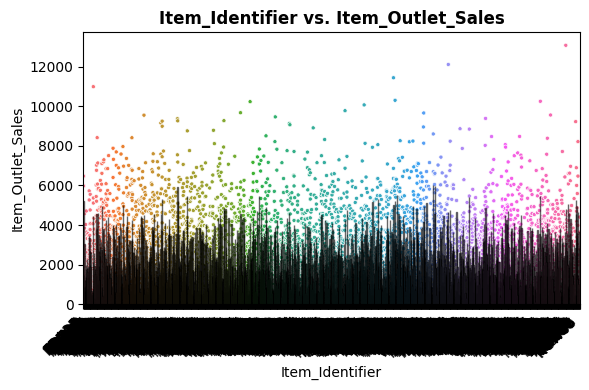

In [28]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- No

- Does this feature appear to be a predictor of the target?
-- No

## Item Fat Content

Whether the Item is Low Fat or Regular

In [31]:
# Get the datatype
feature = 'Item_Fat_Content'
df[feature].dtype

dtype('O')

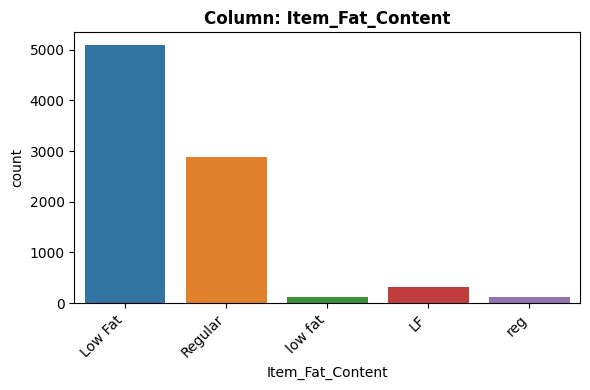

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Low Fat' occurs 5089 times (59.71%)
- Not constant or quasi-constant.


In [32]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute.

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 59.71%

- What is the cardinality? Is it high?
-- No, there are only 2 values
-- The data for this feature needs to be cleaned

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, the fat content will probably influence the buying decision

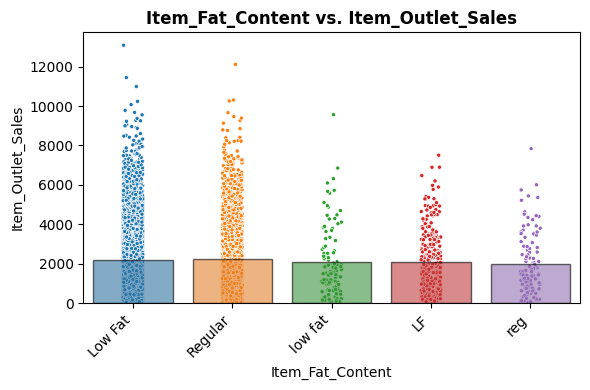

In [33]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- No, which is confusing

## Item Type

The Category to which the item belongs

In [34]:
# Get the datatype
feature = 'Item_Type'
df[feature].dtype

dtype('O')

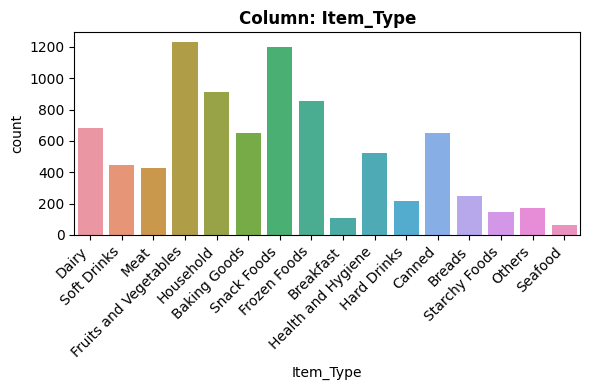

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [35]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute.

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 14.46%

- What is the cardinality? Is it high?
-- Yes (16)
-- This feature should be used with caution

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, certain types of foodstuffs are probably more expensive than others

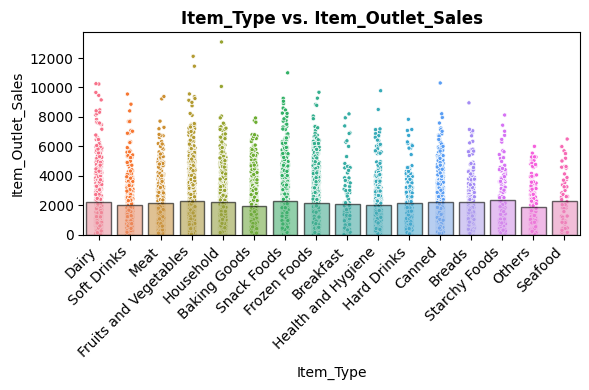

In [36]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Not really, the mean and distribution seem pretty stable

## Outlet Identifier

Store ID

In [37]:
# Get the datatype
feature = 'Outlet_Identifier'
df[feature].dtype

dtype('O')

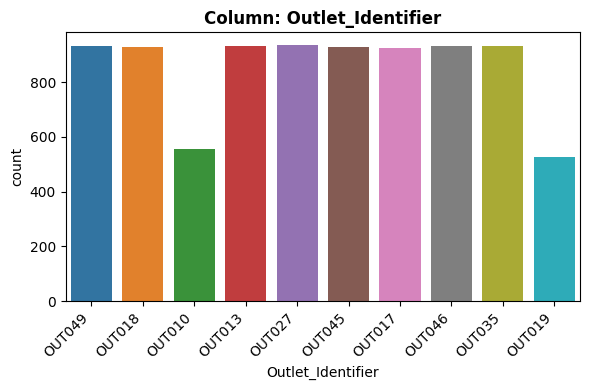

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [38]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute.

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 10.97%

- What is the cardinality? Is it high?
-- No (10)

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, there are a number of reasons why certain outlets will have higher sales than others

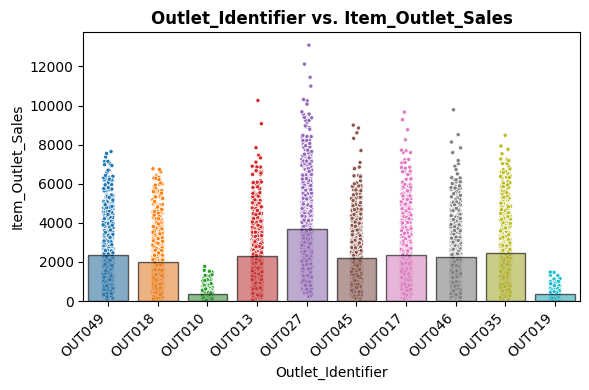

In [39]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Yes

## Outlet Size

The Size of the Store in terms of Ground Area Covered

In [40]:
# Get the datatype
feature = 'Outlet_Size'
df[feature].dtype

dtype('O')

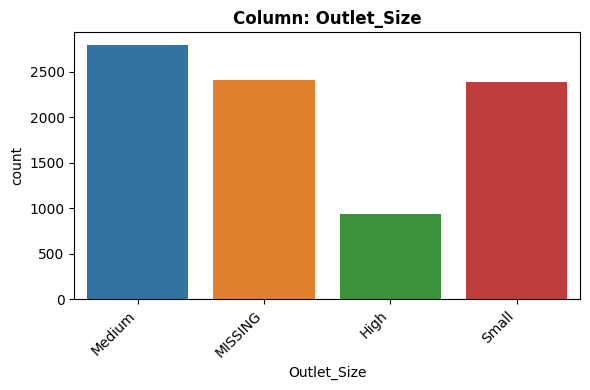

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [41]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 2410 null values.
-- 28.28 %
-- There might be a relationship between the Outlet Type and the Outlet Size, otherwise you could change the data to 'MISSING'

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 32.77%

- What is the cardinality? Is it high?
-- No (4)

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, there is a good chance that the size of the store will have an impact on sales

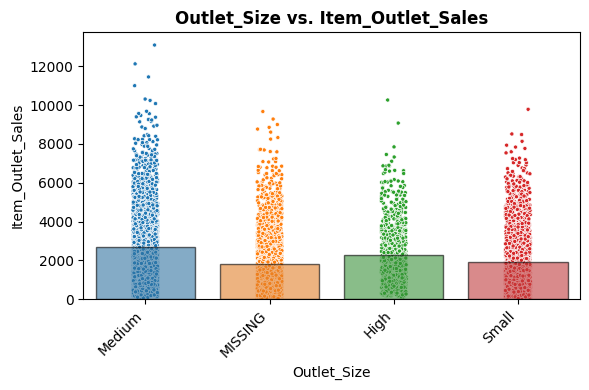

In [42]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Yes

## Outlet Location Type

The Type of Area in which the Store is Located

In [43]:
# Get the datatype
feature = 'Outlet_Location_Type'
df[feature].dtype

dtype('O')

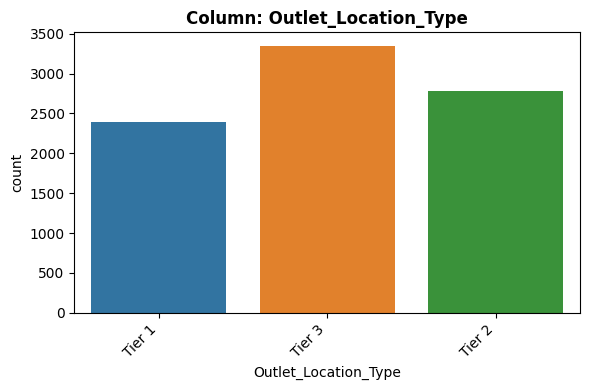

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [44]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute.

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 39.31%

- What is the cardinality? Is it high?
-- No (3)

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, the area where the store is is likely to affect the sales

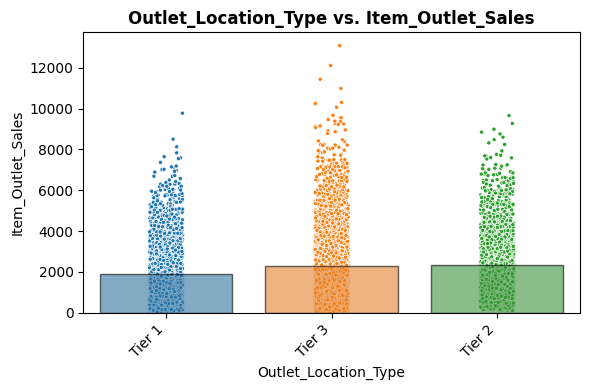

In [45]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Yes, there are differences in mean and distibution

## Outlet Type

Whether the Outlet is a Grocery Store or some sort of Supermarket

In [46]:
# Get the datatype
feature = 'Outlet_Type'
df[feature].dtype

dtype('O')

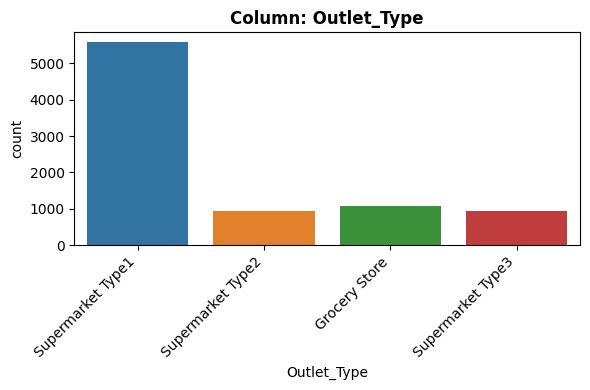

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [47]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute.

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 65.43%

- What is the cardinality? Is it high?
-- No (4)

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, the type of store could also affect the sales

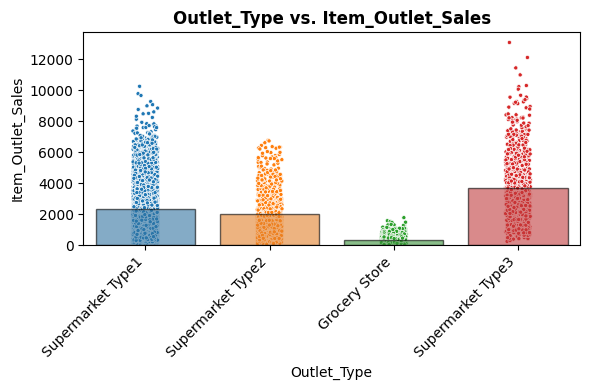

In [48]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Yes, this feature has significant differences in mean and distribution

## Item Weight

Weight of Product

In [49]:
# Get the datatype
feature = 'Item_Weight'
df[feature].dtype

dtype('float64')

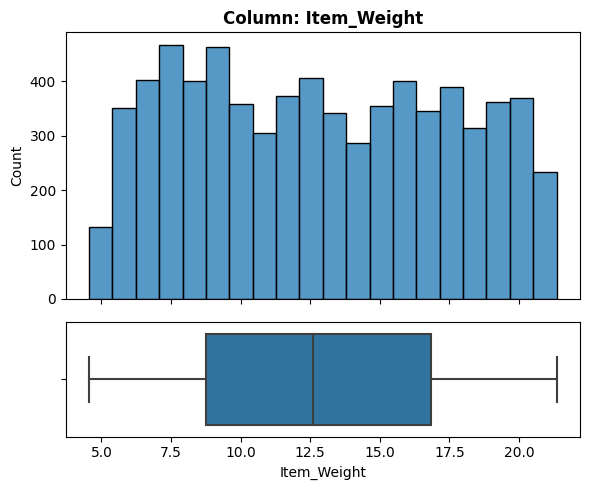

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [51]:
# call the Correct Univariate function
explore_numeric(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 1463 null values.
-- 17.17%
-- Probably need to impute with the mean of the other values, since there are such a large number

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 17.17%

- What is the cardinality? Is it high?
-- Cardinality is not taken into consideration for numeric features

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, the weight of a food item will impact the price

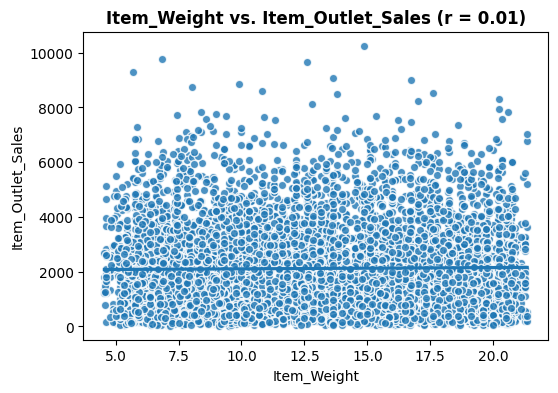

In [52]:
# Call the correct Multivariate function
plot_numeric_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- No, not at all!!

## Item Visibility

The Percentage of Total Display Area in a Store Allocated to the Particular Product

In [53]:
# Get the datatype
feature = 'Item_Visibility'
df[feature].dtype

dtype('float64')

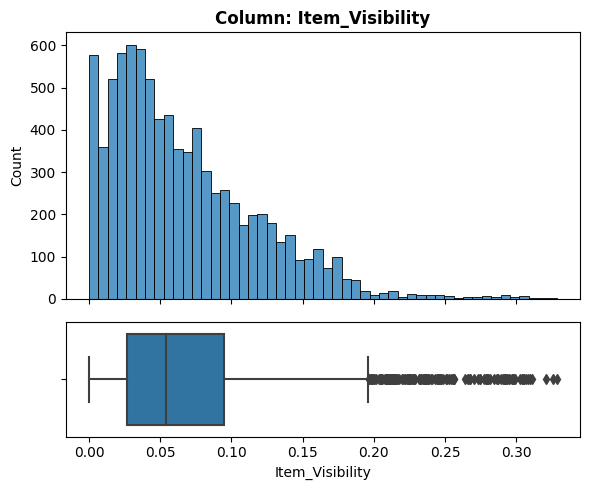

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [54]:
# call the Correct Univariate function
explore_numeric(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 6.17%

- What is the cardinality? Is it high?
-- Cardinality is not taken into consideration for numeric features

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, the visibility of a food item will impact the sales

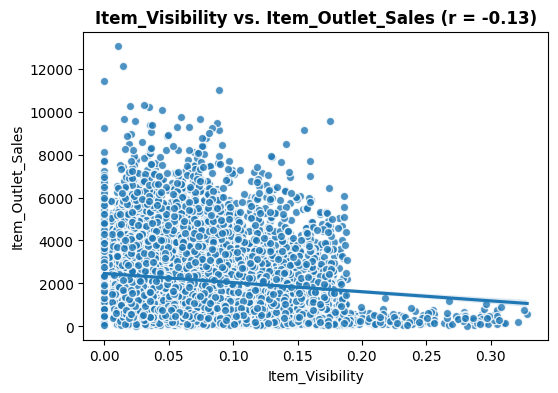

In [55]:
# Call the correct Multivariate function
plot_numeric_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Yes, but with a negative correlation, which is opposite of what I would expect

## Item MRP

Maximum Retail Price (List Price) of the Product

In [56]:
# Get the datatype
feature = 'Item_MRP'
df[feature].dtype

dtype('float64')

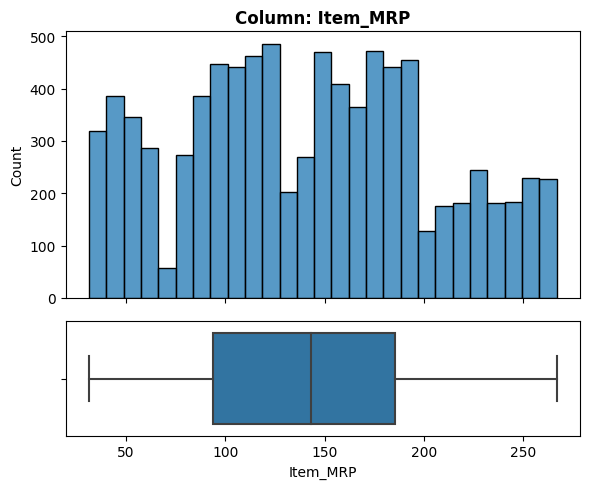

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [57]:
# call the Correct Univariate function
explore_numeric(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 0.08%

- What is the cardinality? Is it high?
-- Cardinality is not taken into consideration for numeric features

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, the price will impact the sales

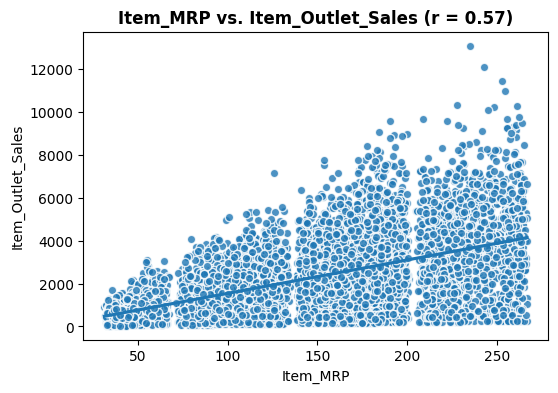

In [58]:
# Call the correct Multivariate function
plot_numeric_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Yes, there is a strong positive correlation

## Outlet Establishment Year

The Year in which the Store was Established

In [59]:
# Get the datatype
feature = 'Outlet_Establishment_Year'
df[feature].dtype

dtype('int64')

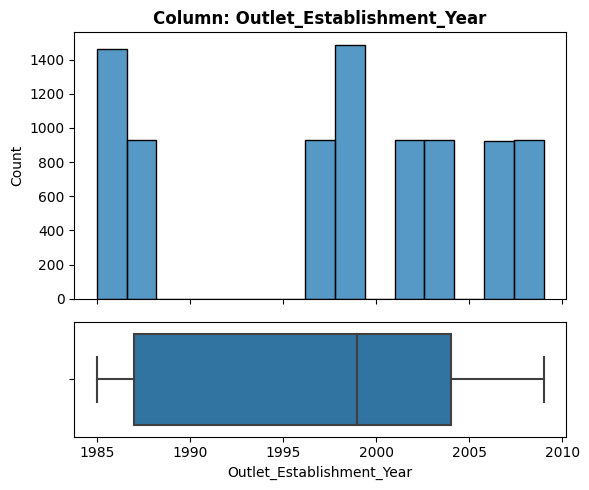

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [60]:
# call the Correct Univariate function
explore_numeric(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 17.17%

- What is the cardinality? Is it high?
-- Cardinality is not taken into consideration for numeric features

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- Yes, shouldn't make a difference ?

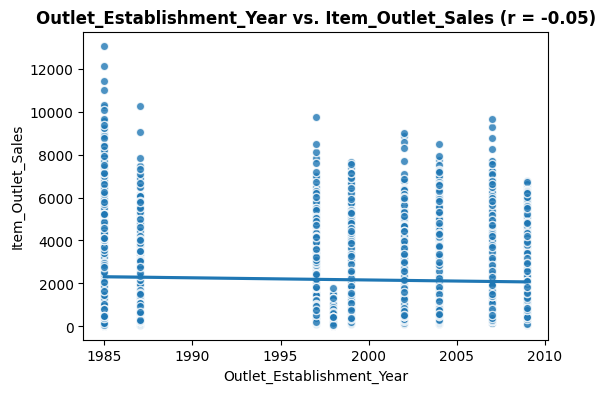

In [61]:
# Call the correct Multivariate function
plot_numeric_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- No

- Does this feature appear to be a predictor of the target?
-- No